#  Datasets & libraries

In [2]:
import pandas as pd
import numpy as np

from read_path_module import read_data_relative_path

Monthly trip csv data <br>
https://s3.amazonaws.com/tripdata/index.html


<br>
Operating Reports: <br>
https://www.citibikenyc.com/system-data/operating-reports


## Trip Data

In [56]:
df_names = ["df_201901", "df_201902", "df_201903", "df_201904", "df_201905", "df_201906", 
              "df_201907", "df_201908", "df_201909", "df_201910", "df_201911", "df_201912", 
              "df_202001", "df_202002", "df_202003", "df_202004", "df_202005"]


In [2]:
df_201904 = pd.read_csv('./tripdata/201904-citibike-tripdata.csv.zip')

## COVID

In [7]:
df_201904

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,88,2019-04-01 00:00:14.7410,2019-04-01 00:01:42.8900,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,36515,Subscriber,1982,1
1,443,2019-04-01 00:00:20.8270,2019-04-01 00:07:44.2920,254,W 11 St & 6 Ave,40.735324,-73.998004,540,Lexington Ave & E 29 St,40.743116,-73.982154,17406,Subscriber,1983,1
2,662,2019-04-01 00:00:30.9960,2019-04-01 00:11:33.2610,3244,University Pl & E 8 St,40.731437,-73.994903,3244,University Pl & E 8 St,40.731437,-73.994903,20775,Subscriber,1988,1
3,86,2019-04-01 00:00:30.9110,2019-04-01 00:01:56.9600,526,E 33 St & 5 Ave,40.747659,-73.984907,474,5 Ave & E 29 St,40.745168,-73.986831,36270,Subscriber,1982,1
4,136,2019-04-01 00:00:32.5930,2019-04-01 00:02:49.3910,461,E 20 St & 2 Ave,40.735877,-73.982050,504,1 Ave & E 16 St,40.732219,-73.981656,36051,Subscriber,1986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766089,516,2019-04-30 23:59:33.7520,2019-05-01 00:08:10.1700,397,Fulton St & Clermont Ave,40.684157,-73.969223,3232,Bond St & Fulton St,40.689622,-73.983043,15005,Subscriber,1983,1
1766090,435,2019-04-30 23:59:35.0850,2019-05-01 00:06:50.4610,432,E 7 St & Avenue A,40.726218,-73.983799,349,Rivington St & Ridge St,40.718502,-73.983299,27227,Subscriber,1992,1
1766091,564,2019-04-30 23:59:40.1050,2019-05-01 00:09:04.3660,3709,W 15 St & 6 Ave,40.738046,-73.996430,432,E 7 St & Avenue A,40.726218,-73.983799,16766,Subscriber,1985,1
1766092,675,2019-04-30 23:59:43.2650,2019-05-01 00:10:58.6670,353,S Portland Ave & Hanson Pl,40.685396,-73.974315,3549,Grand Ave & Bergen St,40.678045,-73.962408,17787,Subscriber,1976,1


In [24]:
print(df_201903.usertype.value_counts())
print(df_202003.usertype.value_counts())

Subscriber    22529
Customer       1077
Name: usertype, dtype: int64


In [26]:
print(df_201905.usertype.value_counts())
print(df_202005.usertype.value_counts())

Subscriber    32364
Customer       3771
Name: usertype, dtype: int64
Subscriber    12952
Customer      12125
Name: usertype, dtype: int64


In [55]:
df_201901.age.value_counts(sort=True)

32     1283
33     1157
31     1053
30      958
34      956
40      896
35      854
29      844
39      774
36      755
37      753
28      632
51      625
38      618
42      585
43      550
27      527
26      512
41      462
44      373
47      361
45      345
58      344
50      317
49      264
62      256
48      240
25      239
46      208
57      203
52      179
60      176
64      167
54      135
53      127
24      120
56      118
55       95
61       85
63       76
66       71
67       68
68       55
59       51
69       49
71       43
22       39
65       37
23       13
70        8
21        6
20        5
79        4
76        3
132       1
19        1
Name: age, dtype: int64

## DA Question 1

#### What are the purposes of the rides? Hypothesize based on common sense. Estimate the proportions of rides which are riders commuting for works.

In [89]:
# Convert to date-time format
df_201901.starttime = pd.to_datetime(df_201901.starttime, format= "%Y-%m-%d %H:%M:%S")
df_201901.stoptime = pd.to_datetime(df_201901.stoptime, format= "%Y-%m-%d %H:%M:%S")

In [94]:
df_201901.starttime.dt.day

0         1
1         1
2         1
3         1
4         1
         ..
19671    26
19672    27
19673    27
19674    29
19675    30
Name: starttime, Length: 19676, dtype: int64

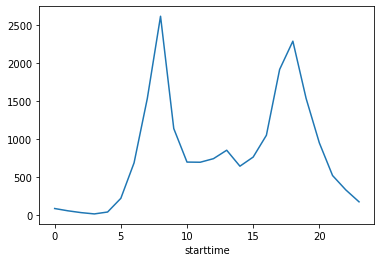

In [107]:

df_201901.groupby(by=[df_201901.starttime.dt.hour]).count()['bikeid'].plot()

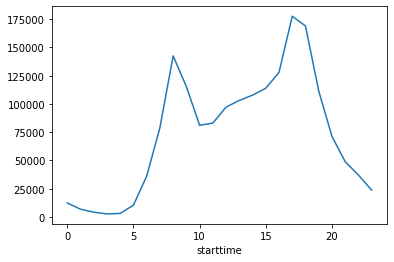

In [8]:
import matplotlib.pyplot as plt

df_201904.starttime = pd.to_datetime(df_201904.starttime, format= "%Y-%m-%d %H:%M:%S")
df_201904.stoptime = pd.to_datetime(df_201904.stoptime, format= "%Y-%m-%d %H:%M:%S")

df_201904.groupby(by=[df_201904.starttime.dt.hour]).count()['bikeid'].plot()

In [115]:
df_202003.starttime = pd.to_datetime(df_202003.starttime, format= "%Y-%m-%d %H:%M:%S")
df_202003.stoptime = pd.to_datetime(df_202003.stoptime, format= "%Y-%m-%d %H:%M:%S")

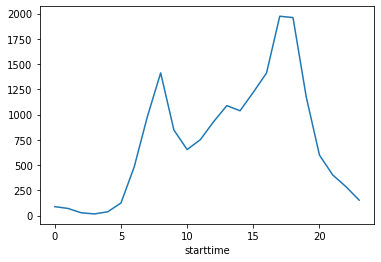

In [117]:
df_202003.groupby(by=[df_202003.starttime.dt.hour]).count()['bikeid'].plot()

In [108]:
df_202004.starttime = pd.to_datetime(df_202004.starttime, format= "%Y-%m-%d %H:%M:%S")
df_202004.stoptime = pd.to_datetime(df_202004.stoptime, format= "%Y-%m-%d %H:%M:%S")

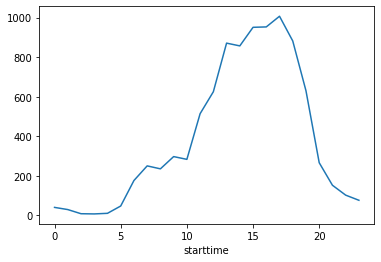

In [114]:
df_202004.groupby(by=[df_202004.starttime.dt.hour]).count()['bikeid'].plot()

#### What are the characteristics of the riders in terms of age/gender?

In [118]:
#create column 'age'
df_201901['age'] = 2020 - df_201901['birth_year']

In [121]:
df_201901.gender.astype('category')

0        1
1        2
2        1
3        0
4        0
        ..
19671    1
19672    1
19673    2
19674    1
19675    1
Name: gender, Length: 19676, dtype: category
Categories (3, int64): [0, 1, 2]

In [3]:
rebalance = pd.read_csv('./Capstone Project Timeline - Sheet4.csv')
total = pd.read_csv('./Total_rides_per_month.csv')

In [4]:
total = total.drop('Unnamed: 0', axis=1)

In [31]:
total.dtypes

year      int64
month    object
rides     int64
dtype: object

In [5]:
total['year'] = total['year'].astype(str)
total['year_month'] = total['year']+'-'+total['month']

In [6]:
rebalance['Year'] = rebalance['Year'].astype(str)
rebalance['year_month'] = rebalance['Year']+'-'+rebalance['Month']

In [7]:
full = pd.merge(total, rebalance, how='right',on='year_month')

full = full.drop(['year','month'], axis=1)

In [8]:
full.year_month = pd.to_datetime(full.year_month, format='%Y-%B')

In [9]:
full = full.drop(['Year','Month'],axis=1)

In [11]:
full = full.sort_values('year_month')

In [17]:
full['percent'] = full['Rebalance']/full['rides']*100

No handles with labels found to put in legend.


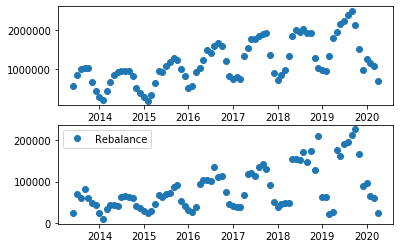

In [122]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1)
# dates = matplotlib.dates.date2num(full.year_month)
ax[0].plot_date(full.year_month,full.rides, label='Rides')
plt.legend()
ax[1].plot_date(full.year_month, full.Rebalance, label='Rebalance')
plt.legend()
plt.show()

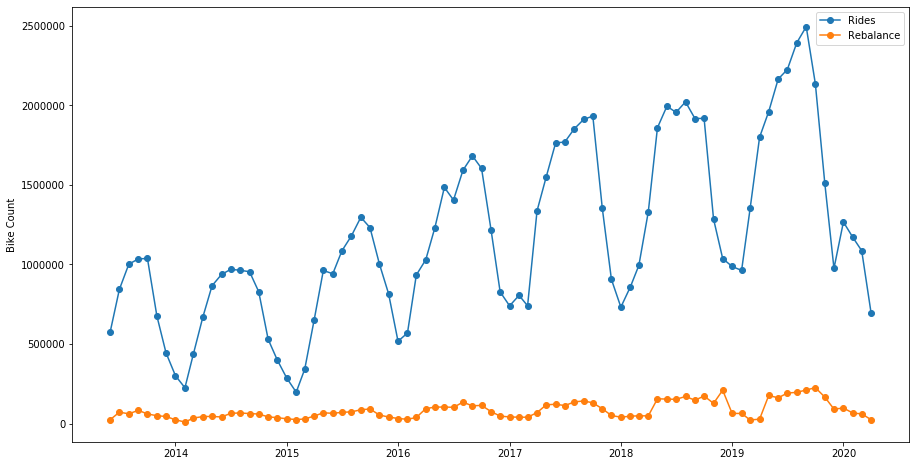

In [127]:

plt.figure(figsize=(15,8))
plt.plot_date(full.year_month,full.rides, label='Rides', ls='solid')
plt.plot_date(full.year_month, full.Rebalance, label='Rebalance', ls='solid')
plt.ylabel('Bike Count')
plt.legend()
plt.show()
# plt.savefig('totbal.png')

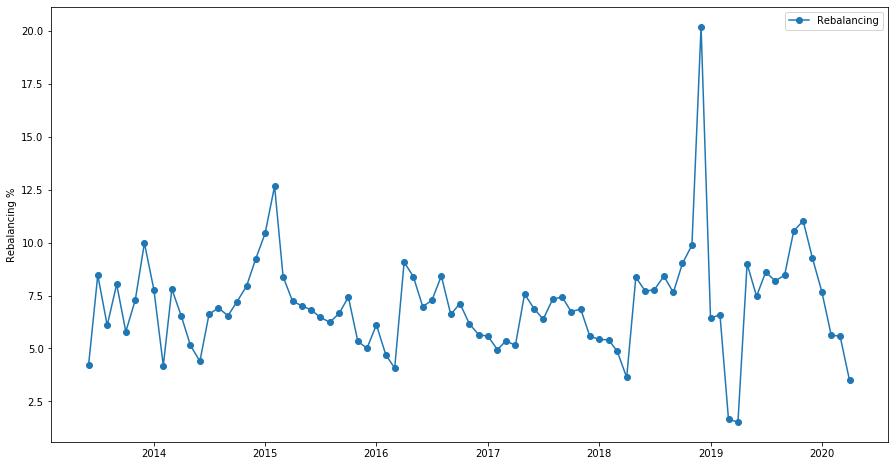

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot_date(full.year_month,full.percent, label='Rebalancing', ls='solid')
plt.ylabel('Rebalancing %')
plt.legend()
plt.show()
# plt.savefig('rebalance.png')

In [25]:
full.set_index('year_month').sort_values(by='percent',ascending=False)

,rides,Rebalance,percent
year_month,,,
2018-12-01,1036710,209396,20.198127
2015-02-01,196930,24938,12.663383
2019-11-01,1509505,166363,11.021030
2019-10-01,2134826,225330,10.554959
2015-01-01,285552,29807,10.438379
...,...,...,...
2016-03-01,933432,38006,4.071641
2018-04-01,1331177,48307,3.628894
2020-04-01,692030,24172,3.492912


## Resource

Cycling Trends in NYC (May 2019) <br>
https://www1.nyc.gov/html/dot/downloads/pdf/cycling-in-the-city.pdf
<br>
Main: https://www1.nyc.gov/html/dot/html/bicyclists/cyclinginthecity.shtml
<br>
<br>




##### The History of Citi Bike <br>
September 2011
NYC DOT announces the selection of a bike share operator for New York City, kicking off an unprecedented public input process.

May 2012
The system name, Citi Bike and sponsors are announced with Citibank as the title sponsor and MasterCard as the Preferred Payment Partner.

April 2013
5,000 Citi Bike founding memberships sell out in 30 hours, weeks before the program is scheduled to launch.

May 2013
Citi Bike launches with 6000 bikes at hundreds of stations throughout Manhattan and Brooklyn.

June 2013
Citi Bike graces the cover of The New Yorker magazine.

December 2013
Citi Bike helps power the New Year’s Eve ball drop in Times Square

August 2014
Total distance travelled on the system passes 20 million miles.

October 2014
New York City Bike Share, the operator of Citi Bike comes under new ownership, who pledge to provide increased private capital to improve the program. The program is boosted by an increased sponsorship commitment from Citi and an increase in the credit facility from the Goldman Sachs Urban Investment Group to allow for the expansion of the program. A 6,000 bike expansion is announced, that will double the size of network from 6,000 to 12,000 bikes.

December 2014
Citi Bike hits the big screen, with bike share being used by Quvenzhané Wallis, who plays Annie in the opening scenes of the 2014 Sony Picture update of the classic musical.

August 2015
Citi Bike expansion begins, bringing 140 new stations to Bed-Stuy, Greenpoint, Long Island City, Williamsburg, and Upper East Side and Upper West Side.

December 2015
Citi Bike riders hit a new milestone, 10 million trips in one year. This breaks the one-year record for bike share ridership in all bike share programs in the Western Hemisphere, aside from Velib in Paris.

May 2016
Citi Bike gains its 100,000th Annual Member.

August 2016
Citi Bike expansion continues bringing another 140 stations in the Upper East Side & Upper West Side in Manhattan and Jersey City, and moving into new Brooklyn neighborhoods. We also grew from 8,000 to 10,000 bikes.

September 2017
Citi Bike adds another 142 stations in Harlem, East Harlem, Astoria, Crown Heights, and Prospect Heights. We also grew from 10,000 to 12,000 bikes.

October 2017
Citi Bike riders take their 50 Millionth trip all time.

May 2018
Citi Bike celebrates 5 years of bike share in NYC with over 143,000 members.

May 2019
Citi Bike becomes available to rent in the Lyft app.